In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_science_job.csv') #Details of Data science job applicants
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [4]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

Percentage of the null values in each columns

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

Exctracted columns with less than 5% null values

In [8]:
cols=[col for col in df.columns if (df[col].isnull().mean()*100)<5 and (df[col].isnull().mean()*100>0)]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
10629,0.827,Full time course,Graduate,10.0,50.0
7060,0.920,Full time course,High School,8.0,48.0
17014,0.925,NaN,NaN,3.0,80.0
698,0.926,no_enrollment,Masters,6.0,76.0
17178,0.698,no_enrollment,Phd,19.0,23.0


Percentage of Rows got deleted after CCA

In [11]:
len(df[cols].dropna())/len(df)*100

89.68577095730244

In [12]:
new_df=df[cols].dropna()
print("Before CCA:-",df.shape,"             ","After CCA:-",new_df.shape)

Before CCA:- (19158, 13)               After CCA:- (17182, 5)


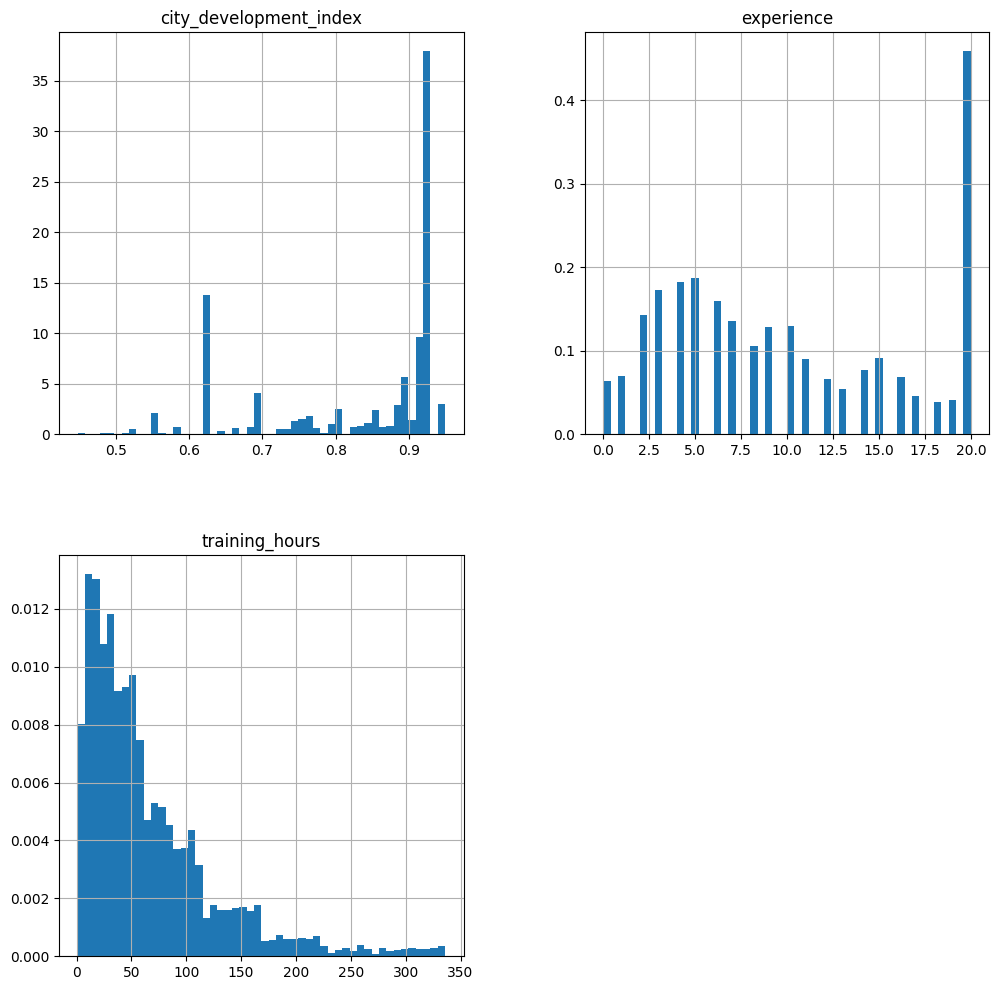

In [13]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<Axes: >

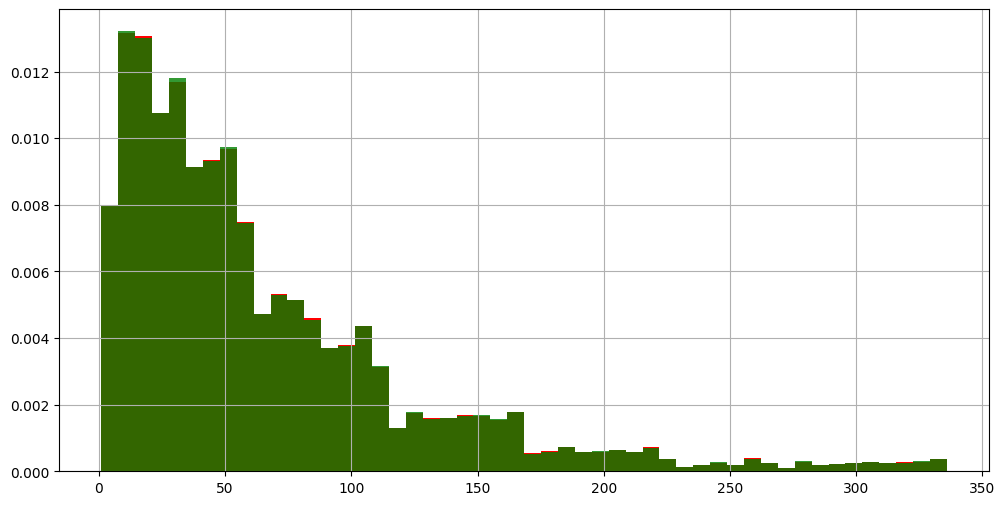

In [14]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
#Original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')
#data after cca ,the argument alpha makes the color transparent ,so we can
#See the overlay of the 2 distribution
new_df['training_hours'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

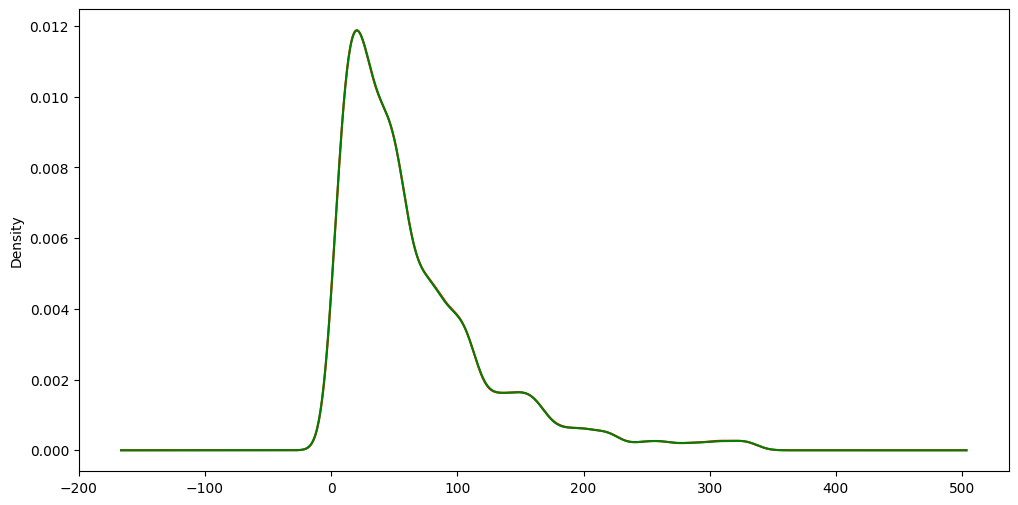

In [15]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
#Original data
df['training_hours'].plot.density(color='red')
#data after cca
new_df['training_hours'].plot.density(color='green')

city_development_index

<Axes: >

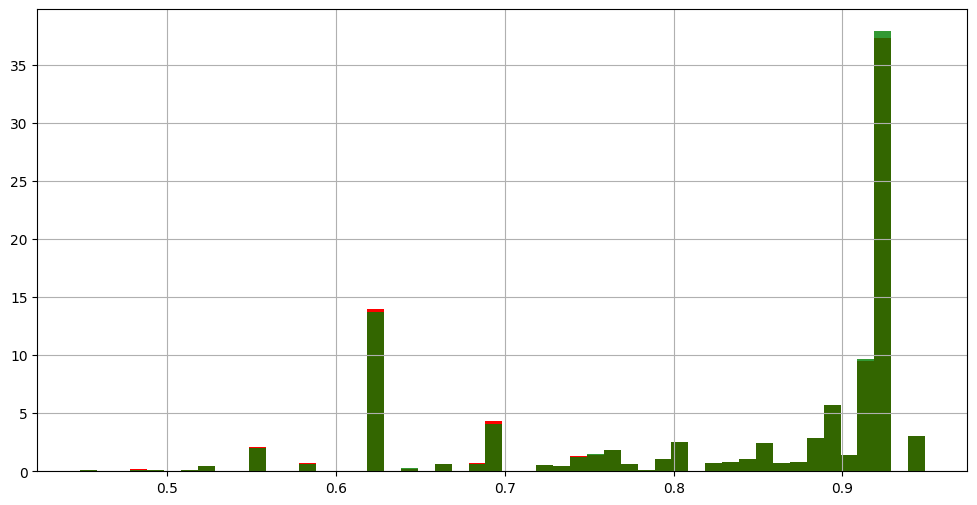

In [16]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
#Original data
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')
#Data after cca,the argument alpha makes the color transparent ,so we can
#see the overlay of the 2 distribution
new_df['city_development_index'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

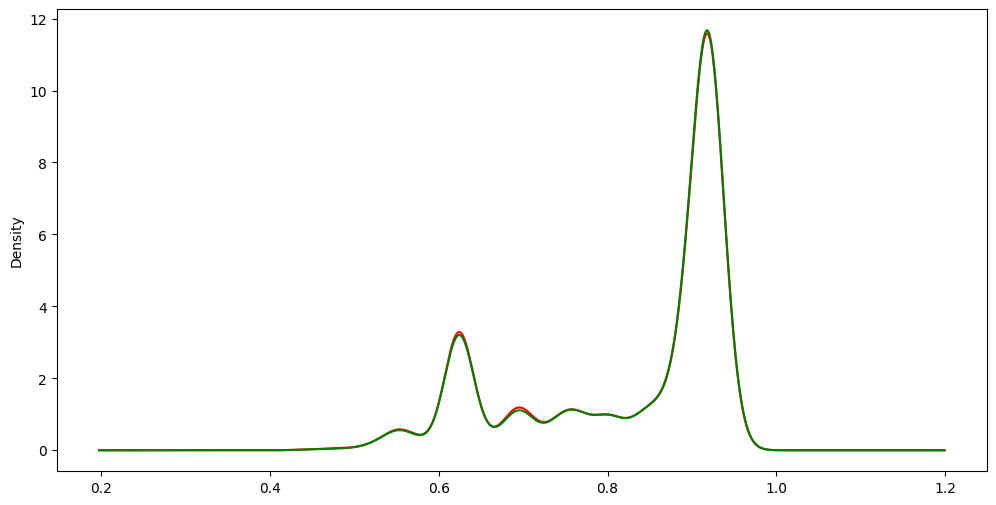

In [17]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
#Original data
df['city_development_index'].plot.density(color='red')
#data after cca 
new_df['city_development_index'].plot.density(color='green')

experience

<Axes: >

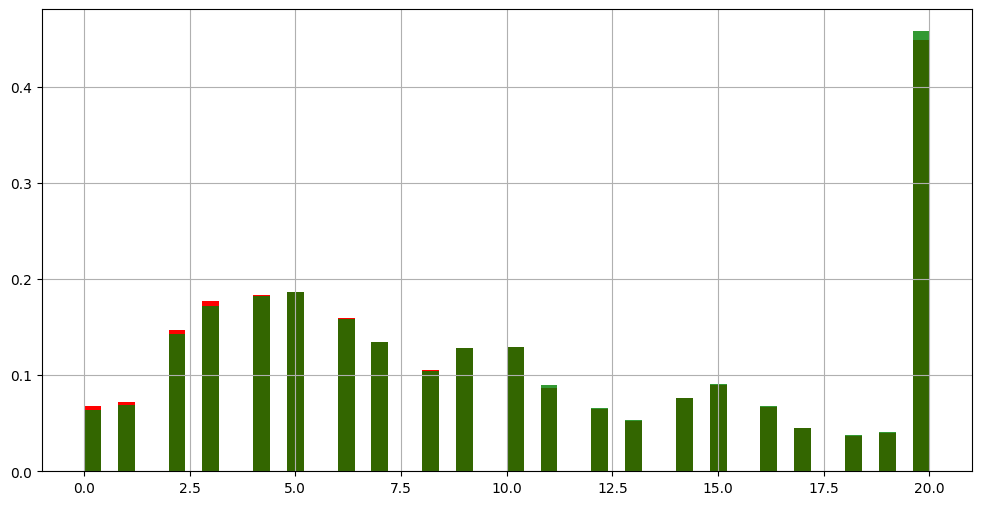

In [19]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot()
#Original data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')
#data after cca,the argument alpha makes the color transparent,so we can
#see the overlay of the r2 distribution
new_df['experience'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

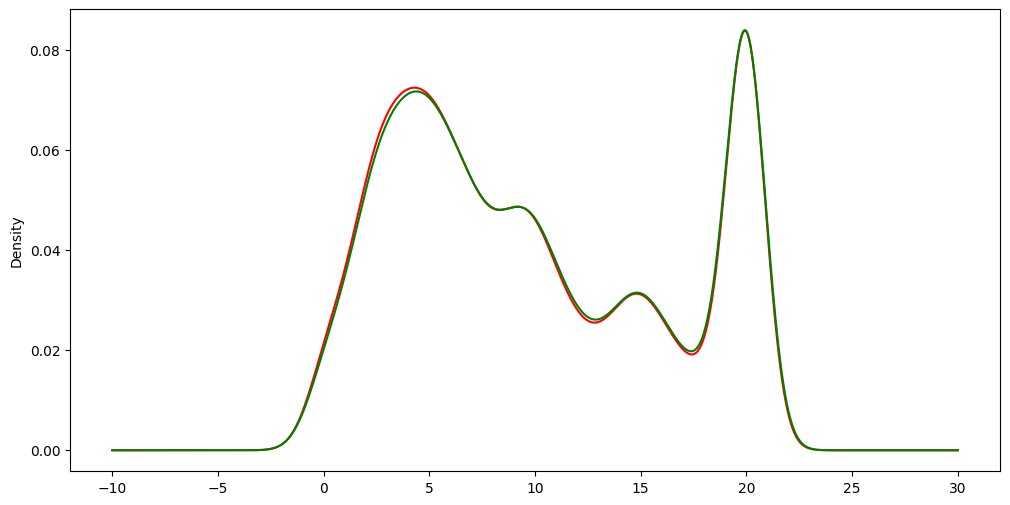

In [20]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot()
#Original data
df['experience'].plot.density(color='red')
#dtaa after cca 
new_df['experience'].plot.density(color='green')

In [21]:
df['enrolled_university'].value_counts()/len(df)*100

enrolled_university
no_enrollment       72.121307
Full time course    19.610607
Part time course     6.253262
Name: count, dtype: float64

In [23]:
temp=pd.concat([
    #percentage of observations per category,original data
    df['enrolled_university'].value_counts()/len(df)*100,
    #percentage of observation per category ,cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
*100],axis=1)
#add columns name
temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


Education level

In [26]:
temp=pd.concat([
    #percentrage of observations per category ,orignal data
    df['education_level'].value_counts()/len(df)*100,
    #Percentage of observations per category ,cca data
    new_df['education_level'].value_counts()/len(df)*100
],axis=1)
temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,60.538678,55.590354
Masters,22.763336,20.993841
High School,10.528239,9.630442
Phd,2.160977,1.983506
Primary School,1.607683,1.487629
